### Algoritmo Genético

In [1]:
import random
import numpy as np
import pandas as pd
from deap import base, creator, algorithms, tools
import matplotlib.pyplot as plt

In [2]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

In [3]:
lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

In [4]:
lista = []
for i in lista_produtos:
    lista.append([i.nome, i.espaco, i.valor])
    
df = pd.DataFrame(lista, columns=["Nome","Espaco","Valor"])
df

,Nome,Espaco,Valor
0,Geladeira Dako,0.75100,999.90
1,Iphone 6,0.00009,2911.12
2,TV 55',0.40000,4346.99
3,TV 50',0.29000,3999.90
4,TV 42',0.20000,2999.00
5,Notebook Dell,0.00350,2499.90
6,Ventilador Panasonic,0.49600,199.90
7,Microondas Electrolux,0.04240,308.66
8,Microondas LG,0.05440,429.90
9,Microondas Panasonic,0.03190,299.29


In [5]:
nomes = list(df.iloc[:,0])
espacos = list(df.iloc[:,1])
valores = list(df.iloc[:,2])

nomes

['Geladeira Dako',
 'Iphone 6',
 "TV 55' ",
 "TV 50' ",
 "TV 42' ",
 'Notebook Dell',
 'Ventilador Panasonic',
 'Microondas Electrolux',
 'Microondas LG',
 'Microondas Panasonic',
 'Geladeira Brastemp',
 'Geladeira Consul',
 'Notebook Lenovo',
 'Notebook Asus']

In [6]:
limite = 3

In [7]:
creator.create("FitnessMax", base.Fitness, weights=(1.0, ))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(espacos))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
def avaliacao(individual):
    
    nota = 0
    soma_espacos = 0
    
    for i in range(len(individual)):
        if individual[i] == 1:
            nota += valores[i]
            soma_espacos += espacos[i]
            
    if soma_espacos > limite:
        nota = 1
        
    return nota / 100000,

In [9]:
toolbox.register("evaluate", avaliacao)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selRoulette)

gen	nevals	max     	min  	med      	std      
0  	20    	0.213443	1e-05	0.0867286	0.0712742
1  	20    	0.203444	1e-05	0.1261   	0.0615752
2  	20    	0.234944	1e-05	0.144358 	0.0635277
3  	20    	0.236943	1e-05	0.160528 	0.0515931
4  	20    	0.236943	0.116371	0.180603 	0.0364866
5  	20    	0.233856	1e-05   	0.180159 	0.0457345
6  	20    	0.236943	0.148954	0.196157 	0.0257488
7  	20    	0.236943	0.164964	0.200394 	0.0239158
8  	20    	0.233856	0.145843	0.192161 	0.0241334
9  	20    	0.239936	0.167569	0.195286 	0.0245775
10 	20    	0.239936	0.167569	0.202778 	0.0271863
11 	20    	0.239936	0.171868	0.213651 	0.0258007
12 	20    	0.239936	1e-05   	0.208441 	0.0512189
13 	20    	0.236943	0.191867	0.227866 	0.0121237
14 	20    	0.236943	0.213857	0.230982 	0.00676126
15 	20    	0.236943	0.211858	0.232241 	0.00685747
16 	20    	0.236943	0.211858	0.231391 	0.00820865
17 	20    	0.236943	0.213857	0.233191 	0.00485534
18 	20    	0.236943	0.231857	0.234091 	0.00171169
19 	20    	0.236849	0.231857	0

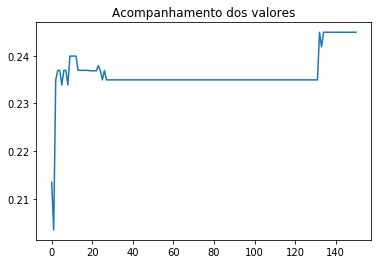

In [10]:
if __name__ == "__main__":
    
    random.seed(10)
    
    populacao = toolbox.population(n = 20)
    probabilidade_crossover = 1.0
    probabilidade_mutacao = 0.01
    numero_geracoes = 150
    
    estatisticas = tools.Statistics(key=lambda individuo: individuo.fitness.values)
    estatisticas.register("max", np.max)
    estatisticas.register("min", np.min)
    estatisticas.register("med", np.mean)
    estatisticas.register("std", np.std)
    
    populacao, info = algorithms.eaSimple(populacao,
                                          toolbox,
                                          probabilidade_crossover,
                                          probabilidade_mutacao,
                                          numero_geracoes,
                                          estatisticas)
    
    melhores = tools.selBest(populacao, 1)
    
    for individuo in melhores:
        
        print(individuo)
        print(individuo.fitness)
        
        soma = 0
        
        for i in range(len(lista_produtos)):
            if individuo[i] == 1:
                soma += valores[i]
                print("Nome: %s R$ %s " % (lista_produtos[i].nome,
                                           lista_produtos[i].valor))
        
        print("Melhor solução: %s" % soma)
        
    valores_grafico = info.select("max")
    
    plt.plot(valores_grafico)
    plt.title("Acompanhamento dos valores")
    plt.show()